In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [49]:
# https://www.kaggle.com/jessemostipak/hotel-booking-demand

pd.set_option('display.max_columns', None)

data0 = pd.read_csv('hotel_bookings.csv')
print(type(data0))
data0

<class 'pandas.core.frame.DataFrame'>


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## cleaning

In [50]:
#data0 = data0.fillna(0)

print('adults / children / babies')

print(data0['adults'].mean())
print(data0['children'].mean())
print(data0['babies'].mean())

print('------------null ?-----------')

print(data0['adults'].isnull().sum())
print(data0['children'].isnull().sum())
print(data0['babies'].isnull().sum())

print('-----------is null-----------')

print(data0.isnull().sum())

print('----------- drop -----------')

data0 = data0.drop(['agent' ,'company'], axis = 1)


print('-----------is null-----------')

print(data0.isnull().sum())


adults / children / babies
1.8564033838679956
0.10388990333874994
0.007948739425412514
------------null ?-----------
0
4
0
-----------is null-----------
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type         

## Population composition

In [4]:
print(data0.groupby('adults').size())
print(data0.groupby('children').size())
print(data0.groupby('babies').size())

adults
0       403
1     23027
2     89680
3      6202
4        62
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
dtype: int64
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
dtype: int64
babies
0     118473
1        900
2         15
9          1
10         1
dtype: int64


In [5]:
number_of_people = pd.DataFrame({'adults' : data0['adults'], 
                                 'children' : data0['children'],
                                 'babies' : data0['babies'],
                                 'people' : data0[['adults', 'children', 'babies']].sum(axis='columns')
                                 })

print(number_of_people)

print(number_of_people['people'].mean())

print(number_of_people['people'].median())

        adults  children  babies  people
0            2       0.0       0     2.0
1            2       0.0       0     2.0
2            1       0.0       0     1.0
3            1       0.0       0     1.0
4            2       0.0       0     2.0
...        ...       ...     ...     ...
119385       2       0.0       0     2.0
119386       3       0.0       0     3.0
119387       2       0.0       0     2.0
119388       2       0.0       0     2.0
119389       2       0.0       0     2.0

[119390 rows x 4 columns]
1.9682385459418712
2.0


In [6]:
type(number_of_people.groupby('adults').size())

# combine and plot bar
# https://www.kite.com/python/answers/how-to-merge-two-pandas-series-into-a-dataframe-in-python
data_people = pd.concat([number_of_people.groupby('adults').size(),
                         number_of_people.groupby('children').size(),
                         number_of_people.groupby('babies').size(),
                         number_of_people.groupby('people').size()
                        ],axis=1).fillna(0)
data_people.columns = ['adults','children','babies','people']

data_people


,adults,children,babies,people
0.0,403.0,110796.0,118473.0,180.0
1.0,23027.0,4861.0,900.0,22581.0
2.0,89680.0,3652.0,15.0,82051.0
3.0,6202.0,76.0,0.0,10495.0
4.0,62.0,0.0,0.0,3929.0
5.0,2.0,0.0,0.0,137.0
6.0,1.0,0.0,0.0,1.0
9.0,0.0,0.0,1.0,0.0
10.0,1.0,1.0,1.0,2.0
12.0,0.0,0.0,0.0,2.0


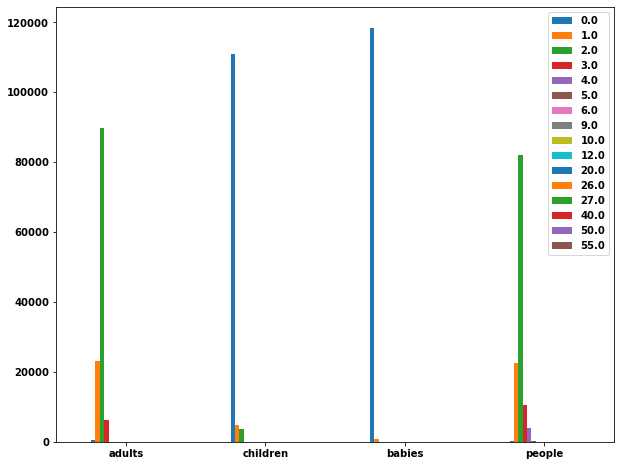

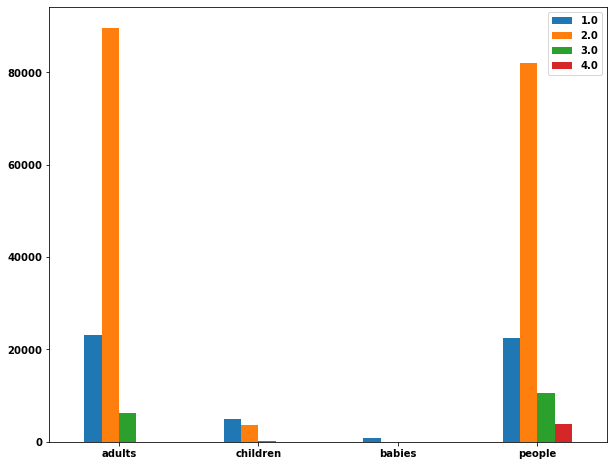

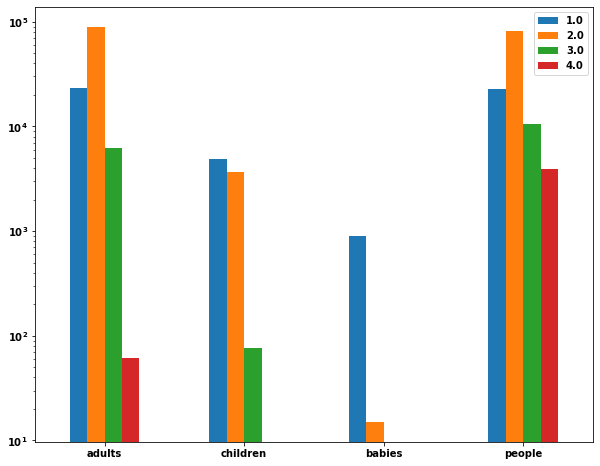

In [7]:
# drop people 
data_people.T.plot.bar(figsize=(10,8),rot=0)

data_people[1:4].T.plot.bar(figsize=(10,8),rot=0)
plt.show()

data_people[1:4].T.plot.bar(figsize=(10,8),rot=0)
plt.yscale('log')
plt.show()

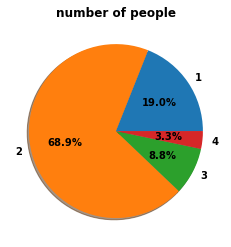

In [15]:
labels = [1,2,3,4]
p = list(data_people.loc[1:4,'people'])

marketshare = p
explode     = (0,0,0,0)

plt.pie(marketshare,
        explode = explode,  # 餅外拉
        labels = labels,
        autopct="%.1f%%",   # 設定數字顯示的格式， %.1f就是1位小數，%%就是帶百分比號
        shadow=True,        # 帶陰影格式
        startangle=0)       # 餅旋轉
                            # 逆時鐘轉

#plt.axis("equal")           # turns off the axis lines and labels
plt.title("number of people")
plt.show()

              is_canceled  lead_time  arrival_date_year  \
hotel                                                     
City Hotel          33102    8705335          159943106   
Resort Hotel        11122    3712588           80765825   

              arrival_date_week_number  arrival_date_day_of_month  \
hotel                                                               
City Hotel                     2155987                    1252353   
Resort Hotel                   1087263                     633799   

              stays_in_weekend_nights  stays_in_week_nights  adults  children  \
hotel                                                                           
City Hotel                      63082                173174  146838    7248.0   
Resort Hotel                    47664                125337   74798    5155.0   

              babies  is_repeated_guest  previous_cancellations  \
hotel                                                             
City Hotel       392       

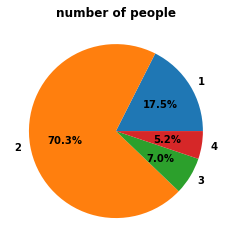

---City Hotel---
       adults  children   babies   people
0.0     390.0   74220.0  78961.0    167.0
1.0   15879.0    3023.0    361.0  15568.0
2.0   58255.0    2024.0      6.0  53935.0
3.0    4775.0      59.0      0.0   7706.0
4.0      31.0       0.0      0.0   1860.0
5.0       0.0       0.0      0.0     92.0
9.0       0.0       0.0      1.0      0.0
10.0      0.0       0.0      1.0      1.0
12.0      0.0       0.0      0.0      1.0


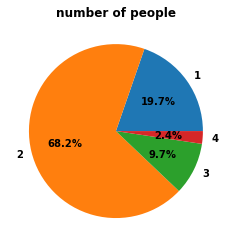

In [44]:
# 計算 商旅 city hotel, 渡假飯店 resort hotel 的人口組成差異

print(data0.groupby('hotel').sum())

data1 = data0[data0.loc[:,'hotel'] == 'Resort Hotel'] # boolean mask
data2 = data0[data0.loc[:,'hotel'] == 'City Hotel']

def number_of_people(data):
    number_of_people = pd.DataFrame({'adults' : data['adults'], 
                                     'children' : data['children'],
                                     'babies' : data['babies'],
                                     'people' : data[['adults', 'children', 'babies']].sum(axis='columns')
                                     })
    data_people = pd.concat([number_of_people.groupby('adults').size(),
                             number_of_people.groupby('children').size(),
                             number_of_people.groupby('babies').size(),
                             number_of_people.groupby('people').size()
                            ],axis=1).fillna(0)
    data_people.columns = ['adults','children','babies','people']
  
    return(data_people)

def plot_people(data_people):
    labels = [1,2,3,4]
    p = list(data_people.loc[1:4,'people'])

    marketshare = p
    explode     = (0,0,0,0)

    plt.pie(marketshare,
            explode = explode,  # 餅外拉
            labels = labels,
            autopct="%.1f%%",   # 設定數字顯示的格式， %.1f就是1位小數，%%就是帶百分比號
            shadow=False,        # 帶陰影格式
            startangle=0)       # 餅旋轉
                                # 逆時鐘轉

    #plt.axis("equal")           # turns off the axis lines and labels
    plt.title("number of people")
    plt.show()    
    
print('---Resort Hotel---')
print(number_of_people(data1))
plot_people(number_of_people(data1))
print('---City Hotel---')
print(number_of_people(data2))
plot_people(number_of_people(data2))

## summary1 : except 4, the type of Hotel didn't dominant by Population composition.

# 取消訂房率

In [61]:
# is_canceled

data1 = data0[data0.loc[:,'hotel'] == 'Resort Hotel'] # boolean mask
data2 = data0[data0.loc[:,'hotel'] == 'City Hotel']

def canceled_rate(data):
    ratio = data['is_canceled'].mean()
    return(ratio)

print('Resort Hotel canceled ratio =', canceled_rate(data1))
print('City Hotel canceled ratio =', canceled_rate(data2))

Resort Hotel canceled ratio = 0.27763354967548676
City Hotel canceled ratio = 0.41726963317786464
